# Predictions for new images

In [13]:
import torch
from torchvision import transforms
from PIL import Image
from model_utils import UNet
import numpy as np
from image_utils import visualize_mask
import os

In [8]:
device = "cuda"
target_size = (64, 64)
class_mapping_opposite = {0: 'Background', 1: 'Skyscraper', 2: 'Car', 3: 'Person'}

model = UNet().to(device)
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [20]:
def predict_mask(image_path, model):
    new_image = Image.open(image_path).resize(target_size).convert("RGB")
    original = np.array(new_image)
    to_tensor = transforms.ToTensor()

    new_image = to_tensor(new_image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(new_image)
        output_softmax = torch.softmax(output, dim=1)
        predicted = torch.argmax(output_softmax, dim=1)

    return original, predicted

def predict_and_show_mask(image_path, model = model, class_mapping = class_mapping_opposite):
    original, predicted = predict_mask(image_path, model)
    visualize_mask(predicted, num_classes=4, class_mapping=class_mapping, original=original)

def predict_and_show_masks_for_dir(image_dir, model = model, class_mapping = class_mapping_opposite):
    images = os.listdir(image_dir)
    images_paths = [image_dir+"/"+im for im in images]
    [predict_and_show_mask(image_path = path, model = model, class_mapping = class_mapping) for path in images_paths]

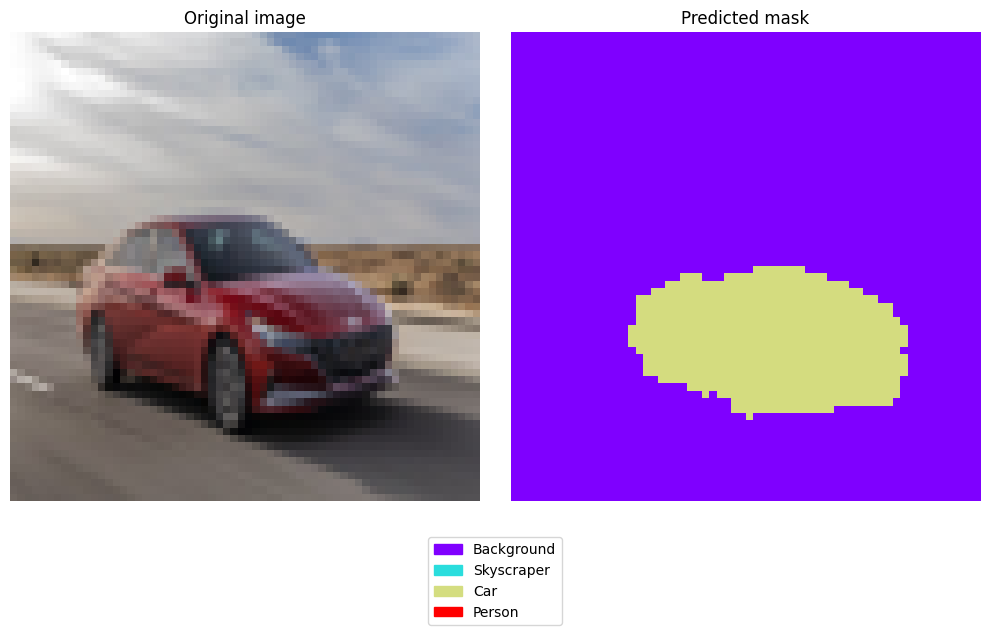

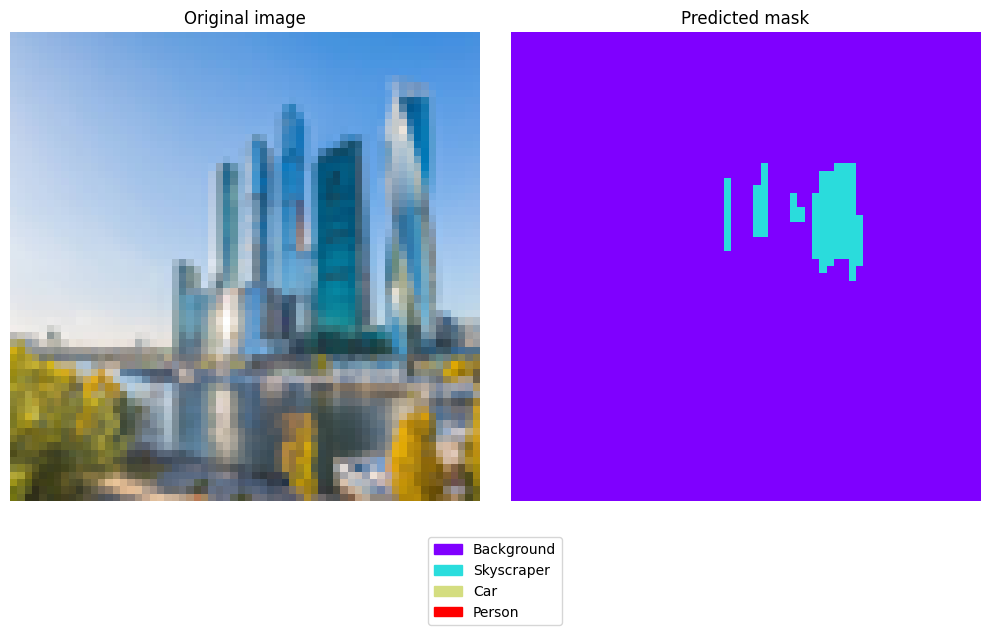

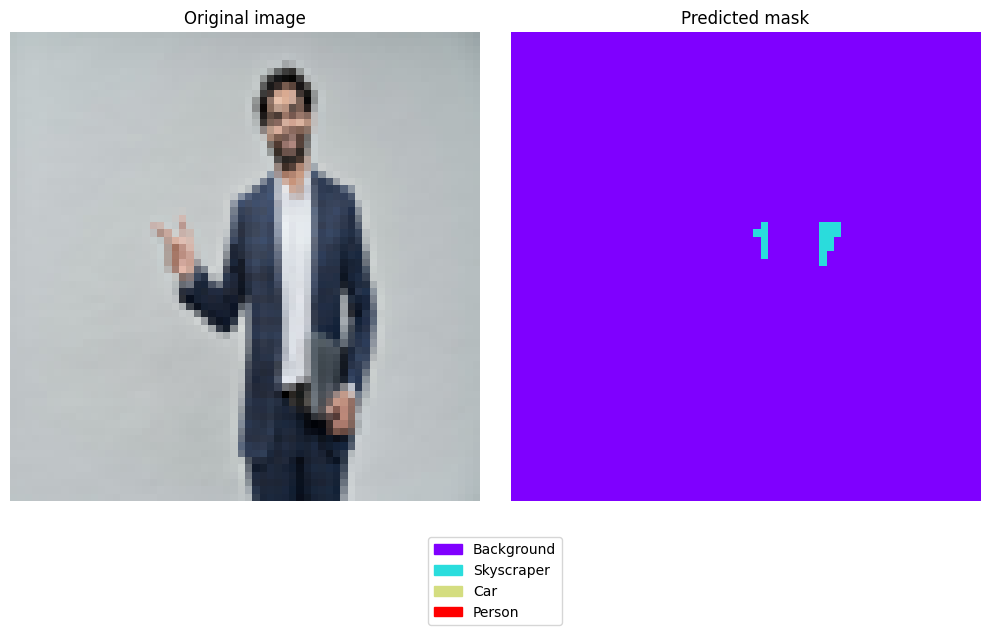

In [26]:
predict_and_show_masks_for_dir(image_dir = "new_images")